# Random Forest Importance 

* Decision Tree feature importance 
  * How much a feature decrease impurity? = How good the feature is at separating the classes? 
  * Features on the higher nodes have greater gains in impurity, meaning more important ones. 
  * Meausre of impurity 
    * Classficiation => Gini or entropy
    * Regression => variance 
* Feature importance in random forest 
  * Average of the feature importance across tress 
* Note: 
  * RF in general give preferenec to features with high cardinality 
  * Correlated features will have the same or similar importance, but reduced importance compared to the same tree built without correlated counterparts 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Classfication

In [3]:
# load dataset
data = pd.read_csv('../datasets/dataset_2.csv')
data.shape

(50000, 109)

In [4]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

## Select Features with tree importance

In [6]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [7]:
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

27

In [8]:
selected_feat

Index(['var_1', 'var_2', 'var_6', 'var_9', 'var_13', 'var_15', 'var_16',
       'var_17', 'var_20', 'var_21', 'var_30', 'var_34', 'var_37', 'var_55',
       'var_60', 'var_67', 'var_69', 'var_70', 'var_71', 'var_82', 'var_87',
       'var_88', 'var_95', 'var_96', 'var_99', 'var_103', 'var_108'],
      dtype='object')

## Feature importance

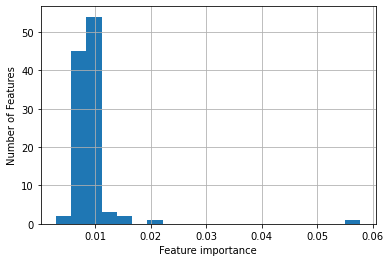

In [9]:
# and now let's plot the distribution of importances

pd.Series(sel_.estimator_.feature_importances_).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [10]:
# and now, let's compare the  amount of selected features
# with the amount of features which importance is above the
# mean of all features, to make sure we understand the output of
# SelectFromModel

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with importance greater than the mean importance of all features: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

total features: 108
selected features: 27
features with importance greater than the mean importance of all features: 27


# Regression

In [11]:
# load dataset
data = pd.read_csv('../datasets/houseprice.csv')
data.shape

(1460, 81)

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [14]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Select Features with tree importance

In [15]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=10))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=10))

In [16]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

5

In [17]:
print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))


total features: 37
selected features: 5
features with coefficients greater than the mean coefficient: 5


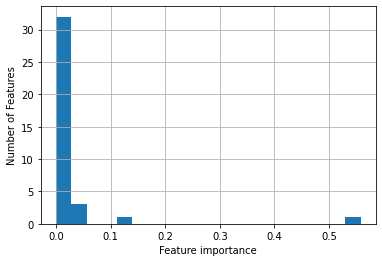

In [18]:
# and now let's plot the distribution of importances

pd.Series(sel_.estimator_.feature_importances_).hist(bins=20)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()